In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
original_df = pd.read_csv('weather_data.csv', low_memory=False)

In [36]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82536 entries, 0 to 82535
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TIME UTC                      82536 non-null  object 
 1   Temp Definition °C            82287 non-null  object 
 2   Dew Point Definition °C       82288 non-null  object 
 3   Rel Hum Definition %          82288 non-null  object 
 4   Precip. Amount Definition mm  82288 non-null  object 
 5   Wind Dir Definition 10's deg  38548 non-null  object 
 6   Wind Spd Definition km/h      38548 non-null  object 
 7   Visibility Definition km      0 non-null      float64
 8   Stn Press Definition kPa      82288 non-null  object 
 9   Hmdx Definition               13528 non-null  float64
 10  Wind Chill Definition         0 non-null      float64
 11  Weather Definition            82288 non-null  object 
dtypes: float64(3), object(9)
memory usage: 7.6+ MB


In [96]:
processed_df = pd.read_csv("preProcessedData.csv", low_memory=False)

processed_df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3439 non-null   int64  
 1   Month             3439 non-null   int64  
 2   Day               3439 non-null   int64  
 3   Temp_mean         3439 non-null   float64
 4   Temp_max          3439 non-null   float64
 5   Temp_min          3439 non-null   float64
 6   DewPoint_mean     3439 non-null   float64
 7   DewPoint_max      3439 non-null   float64
 8   DewPoint_min      3439 non-null   float64
 9   RelHum_mean       3439 non-null   float64
 10  RelHum_max        3439 non-null   float64
 11  RelHum_min        3439 non-null   float64
 12  PrecipAmount_sum  3439 non-null   float64
 13  StnPress_mean     3439 non-null   float64
 14  StnPress_max      3439 non-null   float64
 15  StnPress_min      3439 non-null   float64
dtypes: float64(13), int64(3)

In [97]:
processed_df.head()

,Year,Month,Day,Temp_mean,Temp_max,Temp_min,DewPoint_mean,DewPoint_max,DewPoint_min,RelHum_mean,RelHum_max,RelHum_min,PrecipAmount_sum,StnPress_mean,StnPress_max,StnPress_min
0,2015,1,1,-5.092,-2.4,-6.8,-12.758,-10.9,-15.9,55.125,62.0,45.0,0.0,99.931,100.45,99.53
1,2015,1,2,-1.729,-0.7,-3.1,-8.804,-4.0,-11.9,59.250,85.0,45.0,0.0,100.519,101.31,99.73
2,2015,1,3,-1.417,1.0,-3.6,-5.121,0.6,-10.6,76.750,99.0,56.0,8.7,101.142,101.62,99.98
3,2015,1,4,2.854,4.7,1.4,1.988,3.9,-2.0,94.333,100.0,75.0,13.7,99.089,99.87,98.55
4,2015,1,5,-7.196,0.1,-11.7,-12.212,-0.7,-18.8,67.833,95.0,54.0,0.8,100.647,101.61,99.43


In [98]:
Q1 = processed_df[['Temp_mean', 'DewPoint_mean', 'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']].quantile(0.25)

Q3 = processed_df[['Temp_mean', 'DewPoint_mean', 'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']].quantile(0.75)

IQR = Q3 - Q1

print("Q1: ", Q1, "\n")
print("Q3: ", Q3, "\n")
print("IQR: ", IQR, "\n")

Q1:  Temp_mean            2.0375
DewPoint_mean       -3.7670
RelHum_mean         57.7920
PrecipAmount_sum     0.0000
StnPress_mean       99.7785
Name: 0.25, dtype: float64 

Q3:  Temp_mean            19.1120
DewPoint_mean        11.4165
RelHum_mean          73.4790
PrecipAmount_sum      1.3000
StnPress_mean       100.7145
Name: 0.75, dtype: float64 

IQR:  Temp_mean           17.0745
DewPoint_mean       15.1835
RelHum_mean         15.6870
PrecipAmount_sum     1.3000
StnPress_mean        0.9360
dtype: float64 



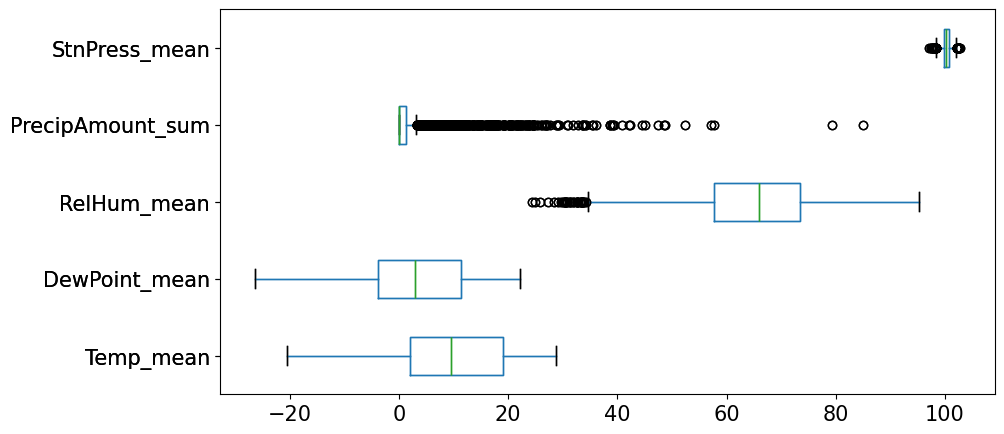

In [101]:
processed_df[['Temp_mean', 'DewPoint_mean', \
              'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']] \
            .boxplot(grid=False, vert=False, fontsize=15, figsize=(10, 5))
plt.show()

In [100]:
processed_df[['Temp_mean', 'DewPoint_mean', \
              'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']] \
            .describe()

,Temp_mean,DewPoint_mean,RelHum_mean,PrecipAmount_sum,StnPress_mean
count,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000
mean,9.911634,3.213395,65.379223,2.209218,100.242320
std,10.047182,9.594449,12.105542,5.869038,0.724695
min,-20.504000,-26.329000,24.458000,0.000000,97.090000
25%,2.037500,-3.767000,57.792000,0.000000,99.778500
50%,9.588000,2.921000,66.000000,0.000000,100.240000
75%,19.112000,11.416500,73.479000,1.300000,100.714500
max,28.742000,22.221000,95.292000,84.900000,102.680000


Xác định ngoại lai

In [102]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:

relhum_outliers = processed_df [ 
                          (processed_df['RelHum_mean'] > upper_bound['RelHum_mean']) 
                        | (processed_df['RelHum_mean'] < lower_bound['RelHum_mean'])
                        # | (processed_df['PrecipAmount_sum'] > upper_bound['PrecipAmount_sum']) 
                        # | (processed_df['PrecipAmount_sum'] < lower_bound['PrecipAmount_sum'])
                        # |  (processed_df['StnPress_mean'] > upper_bound['StnPress_mean']) 
                        # | (processed_df['StnPress_mean'] < lower_bound['StnPress_mean'])
                        ]

relhum_outliers.drop(columns=['Year', 'Month', 'Day']).describe()

,Temp_mean,Temp_max,Temp_min,DewPoint_mean,DewPoint_max,DewPoint_min,RelHum_mean,RelHum_max,RelHum_min,PrecipAmount_sum,StnPress_mean,StnPress_max,StnPress_min
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,12.548781,17.209375,8.150000,-4.534688,-0.37500,-8.253125,31.071625,45.250000,20.84375,0.046875,100.987844,101.194375,100.659375
std,6.054220,6.667851,5.778938,5.594354,5.73782,5.699065,2.607600,6.554978,3.97662,0.141386,0.515155,0.542800,0.512388
min,-4.362000,-2.600000,-7.700000,-18.233000,-13.80000,-23.500000,24.458000,33.000000,12.00000,0.000000,99.676000,99.850000,99.490000
25%,10.186750,14.600000,6.475000,-7.082000,-3.35000,-11.525000,30.198000,40.000000,18.00000,0.000000,100.696750,100.875000,100.307500
50%,13.473000,18.150000,8.900000,-3.812500,-0.45000,-7.150000,31.437500,45.500000,22.00000,0.000000,101.130500,101.280000,100.675000
75%,15.554000,20.925000,10.850000,-1.531250,3.60000,-5.650000,33.198000,50.000000,23.25000,0.000000,101.271000,101.572500,100.977500
max,25.938000,32.700000,19.200000,8.008000,10.00000,6.000000,34.250000,62.000000,27.00000,0.600000,101.827000,102.100000,101.530000


In [ ]:
precip_outliers = processed_df [ 
                                  (processed_df['PrecipAmount_sum'] > upper_bound['PrecipAmount_sum'])
                                | (processed_df['PrecipAmount_sum'] < lower_bound['PrecipAmount_sum'])]

precip_outliers.drop(columns=['Year', 'Month', 'Day']).describe()

,Temp_mean,Temp_max,Temp_min,DewPoint_mean,DewPoint_max,DewPoint_min,RelHum_mean,RelHum_max,RelHum_min,PrecipAmount_sum,StnPress_mean,StnPress_max,StnPress_min
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,10.070052,13.458031,7.317444,5.945518,9.397755,1.989637,77.244522,91.834197,57.013817,11.494991,99.753627,100.269154,99.268756
std,9.024750,9.755989,8.903465,8.472819,8.114499,9.161609,8.227641,3.309335,14.160834,9.935910,0.688823,0.669045,0.762599
min,-15.329000,-13.800000,-18.200000,-19.033000,-16.200000,-27.000000,49.917000,78.000000,18.000000,3.300000,97.090000,98.160000,96.440000
25%,3.104500,5.100000,0.800000,-0.566500,3.000000,-4.750000,72.021000,90.000000,47.000000,5.100000,99.364500,99.830000,98.800000
50%,9.108000,13.000000,6.600000,5.308000,9.100000,1.200000,77.875000,92.000000,57.000000,8.000000,99.765000,100.230000,99.350000
75%,18.333000,22.100000,15.200000,13.508500,17.200000,9.500000,82.521000,94.000000,66.000000,14.300000,100.188000,100.655000,99.785000
max,27.350000,32.600000,23.100000,21.992000,25.100000,20.800000,95.000000,100.000000,92.000000,84.900000,101.513000,102.740000,101.220000


In [108]:
StnPress_outliers = processed_df [ 
                        # | (processed_df['PrecipAmount_sum'] > upper_bound['PrecipAmount_sum']) 
                        # | (processed_df['PrecipAmount_sum'] < lower_bound['PrecipAmount_sum'])
                          (processed_df['StnPress_mean'] > upper_bound['StnPress_mean']) 
                        | (processed_df['StnPress_mean'] < lower_bound['StnPress_mean'])
                        ]

relhum_outliers.drop(columns=['Year', 'Month', 'Day']).describe()

,Temp_mean,Temp_max,Temp_min,DewPoint_mean,DewPoint_max,DewPoint_min,RelHum_mean,RelHum_max,RelHum_min,PrecipAmount_sum,StnPress_mean,StnPress_max,StnPress_min
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,12.548781,17.209375,8.150000,-4.534688,-0.37500,-8.253125,31.071625,45.250000,20.84375,0.046875,100.987844,101.194375,100.659375
std,6.054220,6.667851,5.778938,5.594354,5.73782,5.699065,2.607600,6.554978,3.97662,0.141386,0.515155,0.542800,0.512388
min,-4.362000,-2.600000,-7.700000,-18.233000,-13.80000,-23.500000,24.458000,33.000000,12.00000,0.000000,99.676000,99.850000,99.490000
25%,10.186750,14.600000,6.475000,-7.082000,-3.35000,-11.525000,30.198000,40.000000,18.00000,0.000000,100.696750,100.875000,100.307500
50%,13.473000,18.150000,8.900000,-3.812500,-0.45000,-7.150000,31.437500,45.500000,22.00000,0.000000,101.130500,101.280000,100.675000
75%,15.554000,20.925000,10.850000,-1.531250,3.60000,-5.650000,33.198000,50.000000,23.25000,0.000000,101.271000,101.572500,100.977500
max,25.938000,32.700000,19.200000,8.008000,10.00000,6.000000,34.250000,62.000000,27.00000,0.600000,101.827000,102.100000,101.530000


In [105]:
from sklearn.ensemble import IsolationForest

# Giả sử df là DataFrame của bạn và column là cột bạn muốn kiểm tra
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(processed_df[['Temp_mean', \
    'DewPoint_mean', 'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']])
processed_df['outlier'] = outliers

# Loại bỏ các giá trị ngoại lai
df_cleaned = processed_df[processed_df['outlier'] == 1]

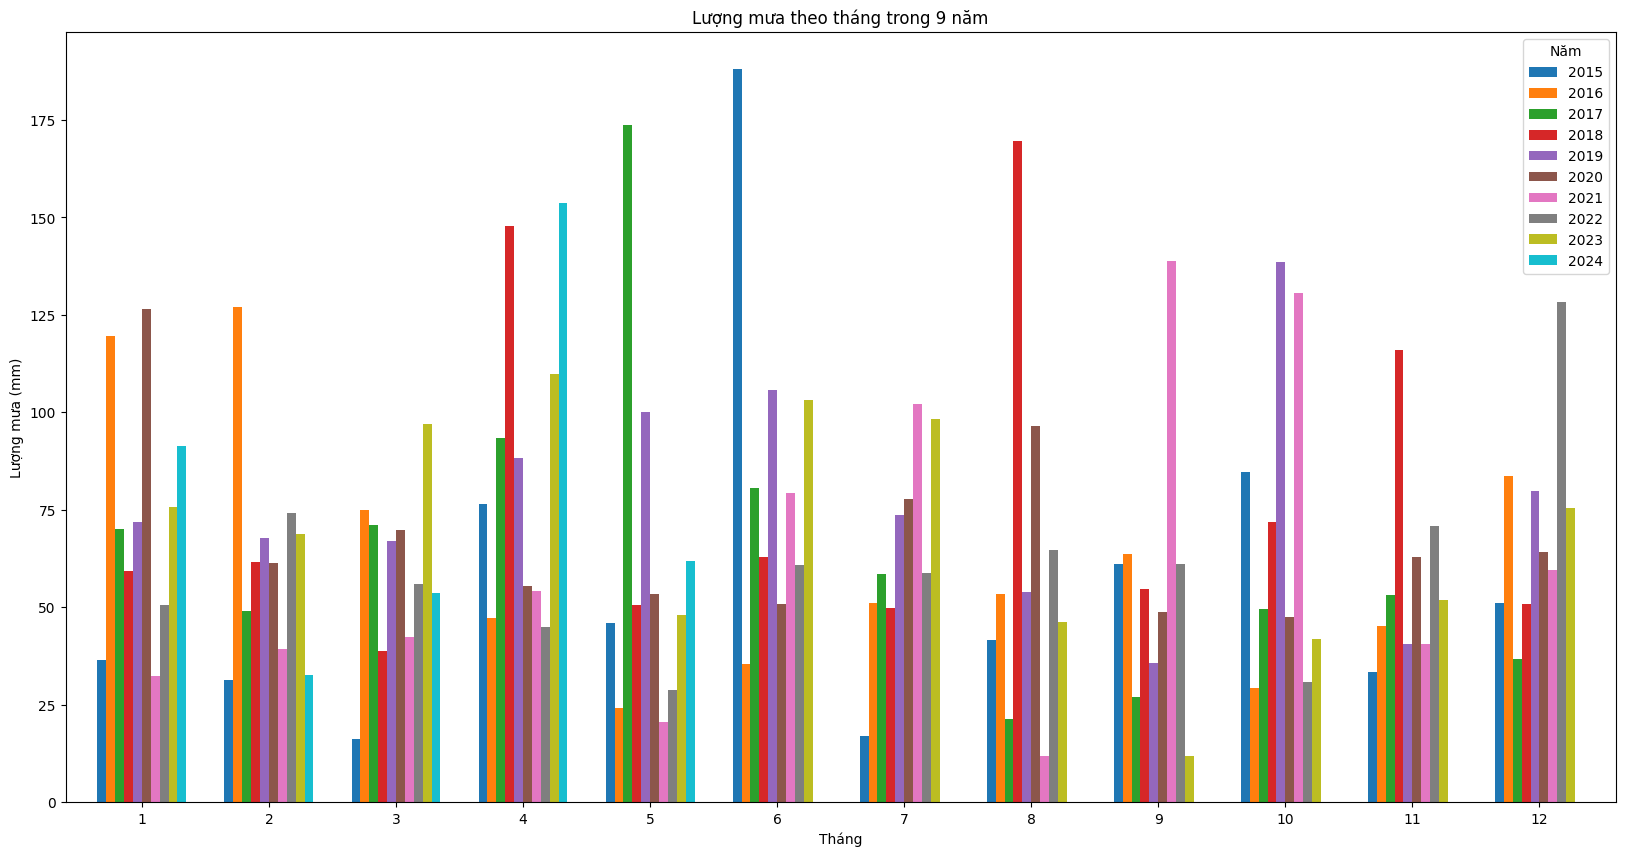

In [106]:
precipGroupedByMonth = processed_df.groupby(['Year', 'Month'])['PrecipAmount_sum'].sum().unstack(level=0)

# Vẽ biểu đồ cột
precipGroupedByMonth.plot(kind='bar', figsize=(20, 10), width=0.7)
plt.title('Lượng mưa theo tháng trong 9 năm')
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa (mm)')
plt.legend(title='Năm')
plt.xticks(rotation=0)
plt.show()

In [118]:
new_df = processed_df.drop(columns=['outlier'])
new_df['Temp_range'] = new_df['Temp_max'] - new_df['Temp_min']
new_df = new_df.drop(columns=['Temp_max', 'Temp_min'])
new_df['DewPoint_range'] = new_df['DewPoint_max'] - new_df['DewPoint_min']
new_df = new_df.drop(columns=['DewPoint_max', 'DewPoint_min'])
new_df['RelHum_range'] = new_df['RelHum_max'] - new_df['RelHum_min']
new_df = new_df.drop(columns=['RelHum_max', 'RelHum_min'])
new_df['StnPress_range'] = new_df['StnPress_max'] - new_df['StnPress_min']
new_df = new_df.drop(columns=['StnPress_max', 'StnPress_min'])

new_df.drop(columns=['Year', 'Month', 'Day']).corr()

,Temp_mean,DewPoint_mean,RelHum_mean,PrecipAmount_sum,StnPress_mean,Temp_range,DewPoint_range,RelHum_range,StnPress_range
Temp_mean,1.000000,0.952349,-0.107728,0.021149,-0.199534,0.312990,-0.149912,0.279574,-0.404566
DewPoint_mean,0.952349,1.000000,0.196505,0.128789,-0.287688,0.185188,-0.223881,0.206460,-0.348928
RelHum_mean,-0.107728,0.196505,1.000000,0.394714,-0.318417,-0.397070,-0.232920,-0.215627,0.173385
PrecipAmount_sum,0.021149,0.128789,0.394714,1.000000,-0.289860,-0.111819,0.049728,0.014690,0.231887
StnPress_mean,-0.199534,-0.287688,-0.318417,-0.289860,1.000000,0.037438,-0.056066,-0.121922,-0.124825
Temp_range,0.312990,0.185188,-0.397070,-0.111819,0.037438,1.000000,0.344769,0.396288,-0.013748
DewPoint_range,-0.149912,-0.223881,-0.232920,0.049728,-0.056066,0.344769,1.000000,0.457316,0.392839
RelHum_range,0.279574,0.206460,-0.215627,0.014690,-0.121922,0.396288,0.457316,1.000000,0.027344
StnPress_range,-0.404566,-0.348928,0.173385,0.231887,-0.124825,-0.013748,0.392839,0.027344,1.000000


In [ ]:
processed_df = pd.read_csv("preProcessedData.csv", low_memory=False)

processed_df['Temp_range'] = processed_df['Temp_max'] - processed_df['Temp_min']
processed_df = processed_df.drop(columns=['Temp_max', 'Temp_min'])
processed_df['DewPoint_range'] = processed_df['DewPoint_max'] - processed_df['DewPoint_min']
processed_df = processed_df.drop(columns=['DewPoint_max', 'DewPoint_min'])
processed_df['RelHum_range'] = processed_df['RelHum_max'] - processed_df['RelHum_min']
processed_df = processed_df.drop(columns=['RelHum_max', 'RelHum_min'])
processed_df['StnPress_range'] = processed_df['StnPress_max'] - processed_df['StnPress_min']
processed_df = processed_df.drop(columns=['StnPress_max', 'StnPress_min'])

processed_df.to_csv("preProcessedData.csv", index=False)